# Objective

Analyze medical images of the prostate to determine the average **size and variability of the prostate** in terms of its dimensions (width in x and y directions).

In [ ]:
!git clone https://github.com/DIAGNijmegen/picai_labels.git

Cloning into 'picai_labels'...
remote: Enumerating objects: 10200, done.
remote: Counting objects: 100% (10200/10200), done.
remote: Compressing objects: 100% (4690/4690), done.
remote: Total 10200 (delta 5663), reused 10010 (delta 5492), pack-reused 0
Receiving objects: 100% (10200/10200), 32.51 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (5663/5663), done.
Updating files: 100% (10100/10100), done.


In [ ]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
# Importing libraries
import numpy as np
import SimpleITK as sitk
import os
from pathlib import Path
import scipy.ndimage
import matplotlib.pyplot as plt

In [ ]:
data_folder = '/content/picai_labels/anatomical_delineations/whole_gland/AI/Bosma22b'
data_path = Path(data_folder)

In [ ]:
# List all .nii.gz files in the data folder
nii_files = list(data_path.glob('*.nii.gz'))

# Check the first .nii.gz file
nii_file = nii_files[0]
img = sitk.ReadImage(str(nii_file))
img_data = sitk.GetArrayFromImage(img)

# Print the shape
print(f"Loaded image shape: {img_data.shape}")
# Print the voxel spacing of the image
print(f"Voxel spacing: {img.GetSpacing()}")

Loaded image shape: (19, 640, 640)
Voxel spacing: (0.30000001192092896, 0.30000001192092896, 3.6000001430511475)


In [ ]:
# Function to resample an image to a new spacing
def resample_image(img, new_spacing, interpolator=sitk.sitkNearestNeighbor):
      # Get the original properties of the image
    original_spacing = img.GetSpacing()    # Original spacing of the image voxels
    original_size = img.GetSize()          # Original size (dimensions) of the image
    original_origin = img.GetOrigin()      # Original origin (starting point) of the image
    original_direction = img.GetDirection()# original direction (orientation) of the image

# Calculate the new size of the image after resampling
    new_size = [
        int(round(original_size[0] * (original_spacing[0] / new_spacing[0]))),
        int(round(original_size[1] * (original_spacing[1] / new_spacing[1]))),
        int(round(original_size[2] * (original_spacing[2] / new_spacing[2])))
    ]
    # Create a resampler object
    resampler = sitk.ResampleImageFilter()
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetSize(new_size)
    resampler.SetOutputOrigin(original_origin)
    resampler.SetOutputDirection(original_direction)
    resampler.SetInterpolator(interpolator)

    # Resample the image
    resampled_img = resampler.Execute(img)

    return resampled_img

# Image resampling:

The images are resampled to a standard voxel spacing ([0.5, 0.5, 3.0]). Resampling standardizes the resolution of all images, making them uniform.

Resampled image shape: (23, 384, 384)
Resampled image data:
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


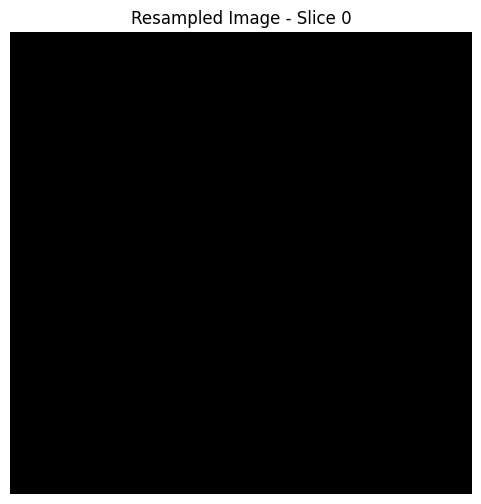

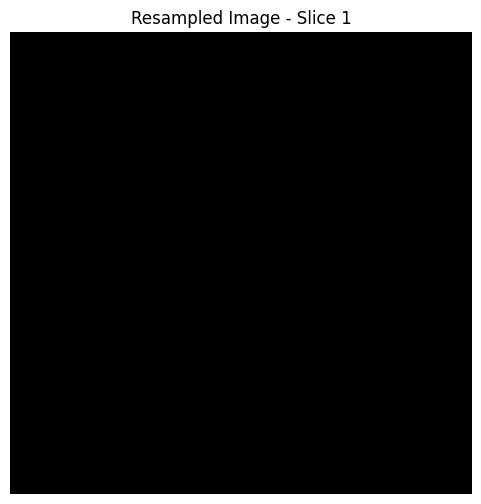

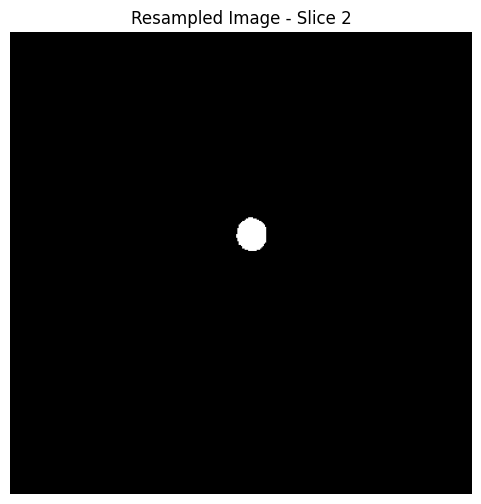

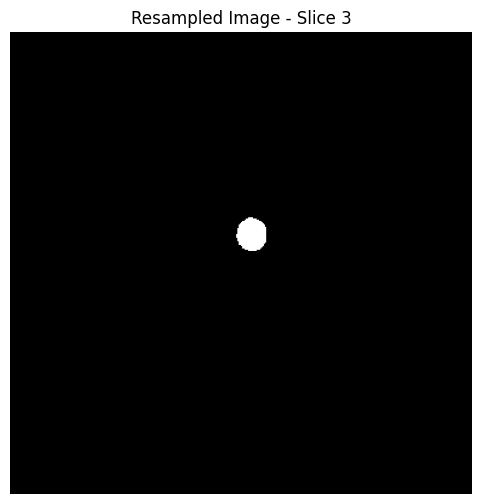

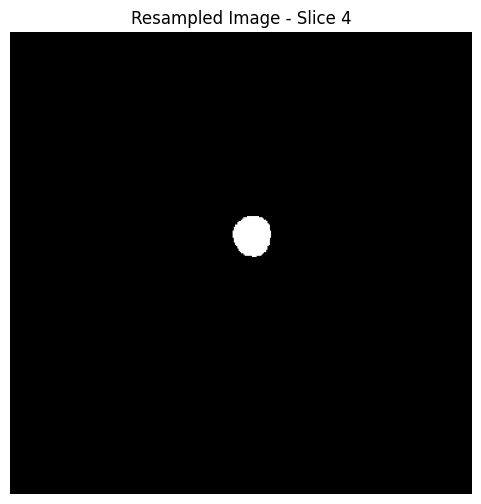

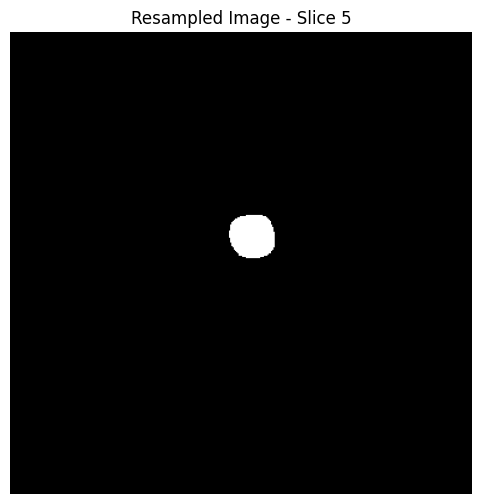

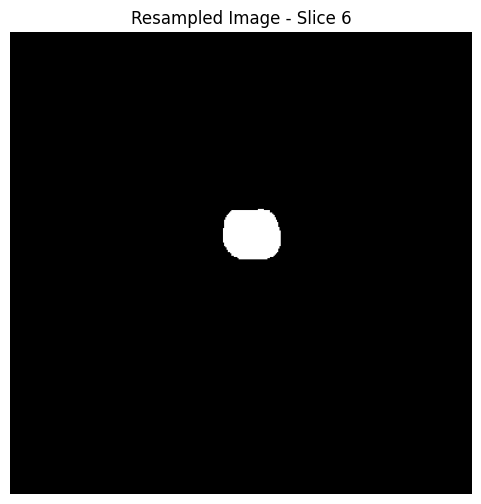

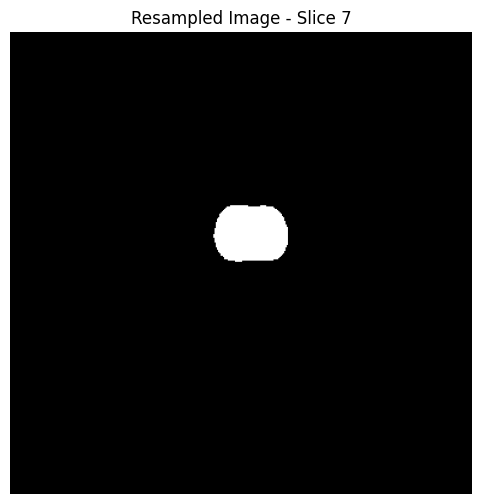

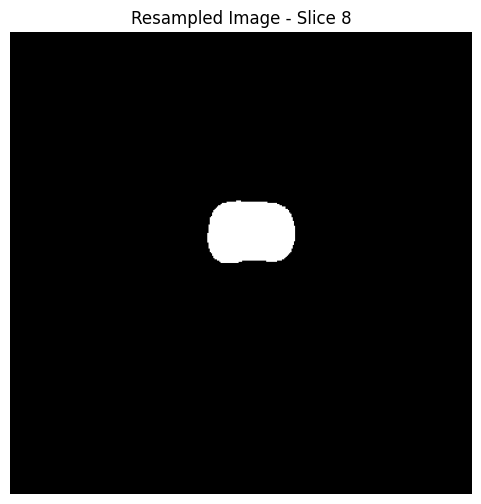

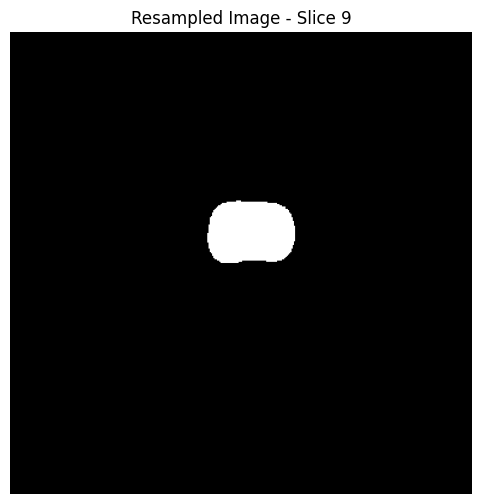

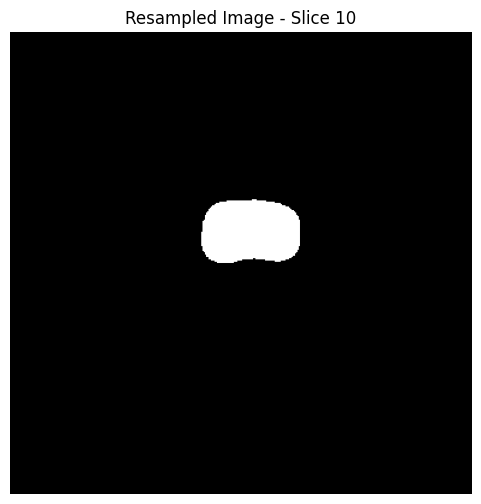

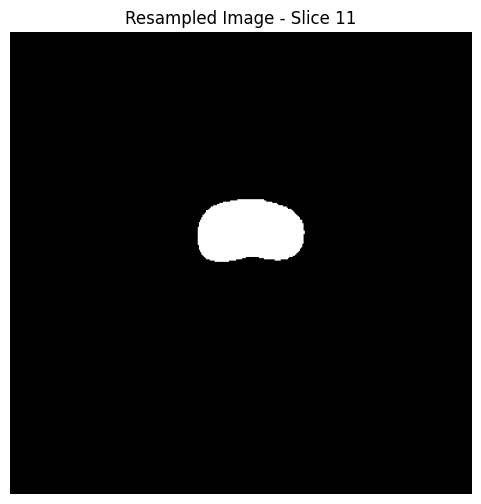

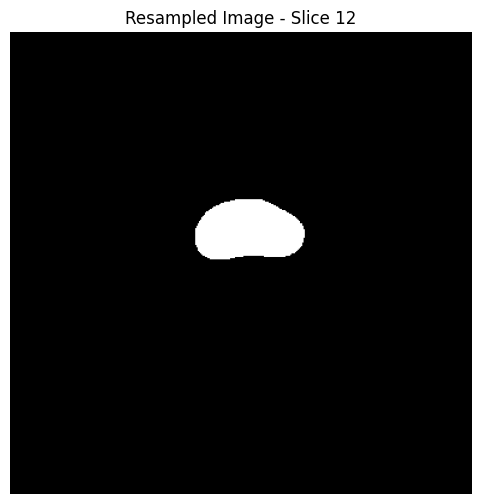

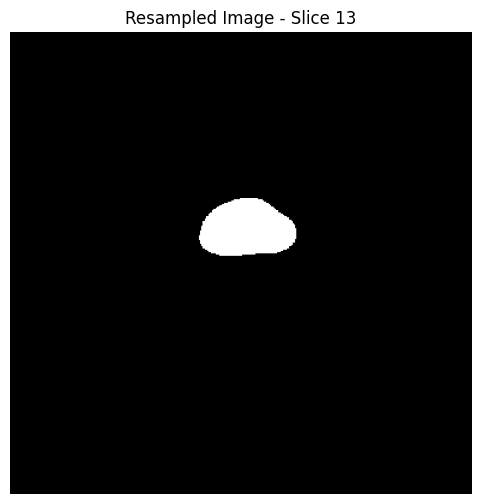

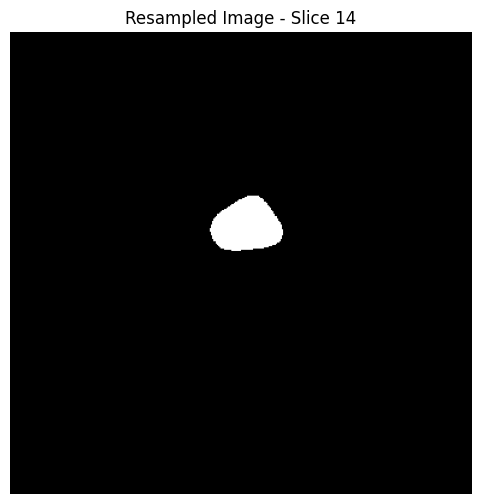

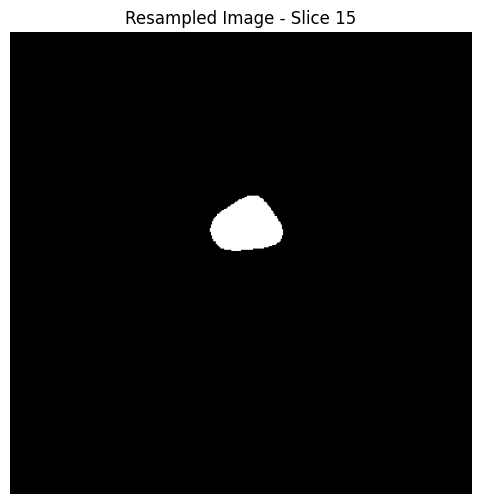

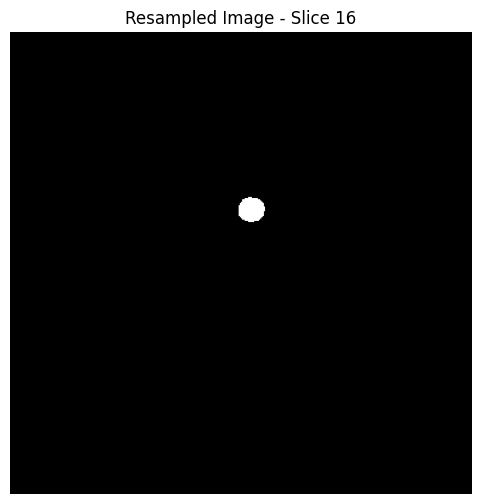

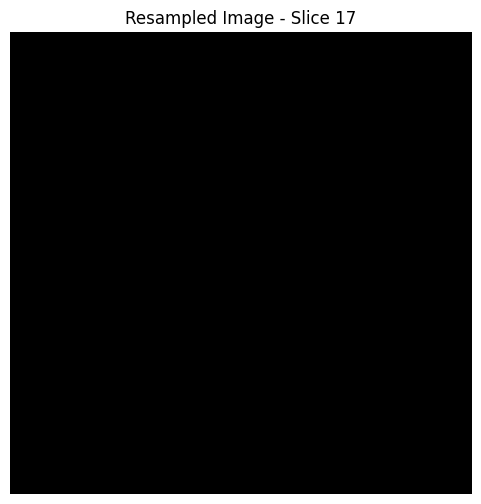

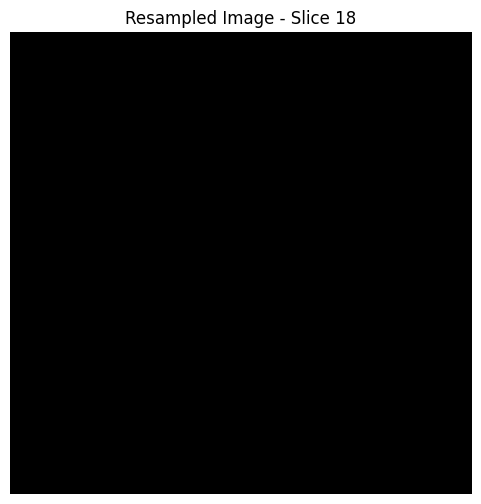

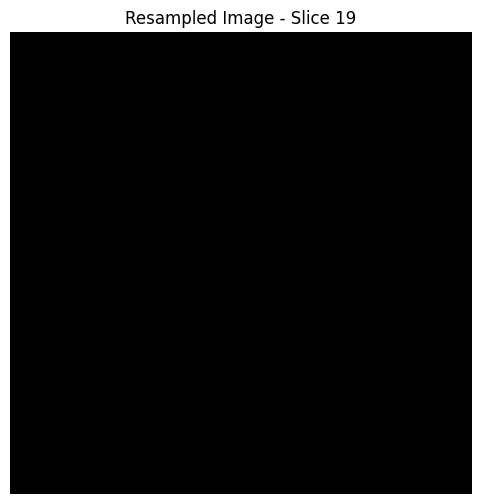

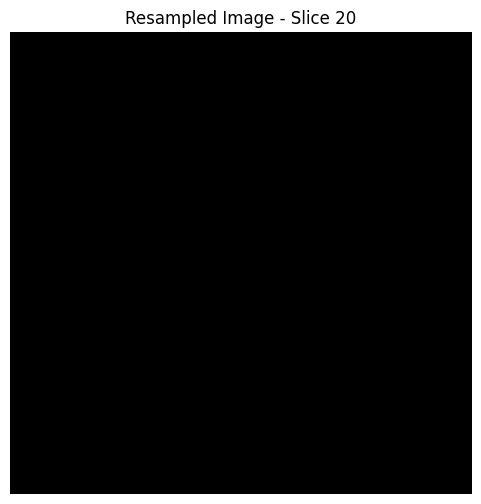

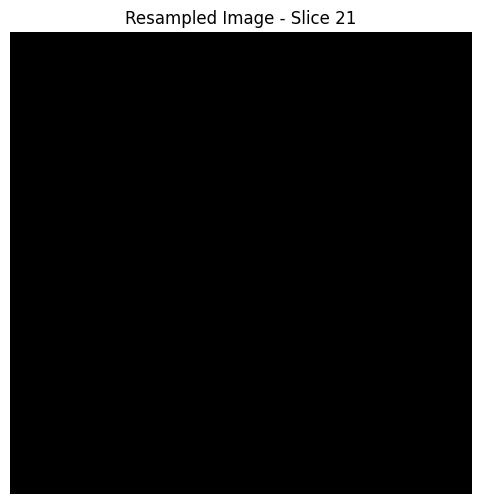

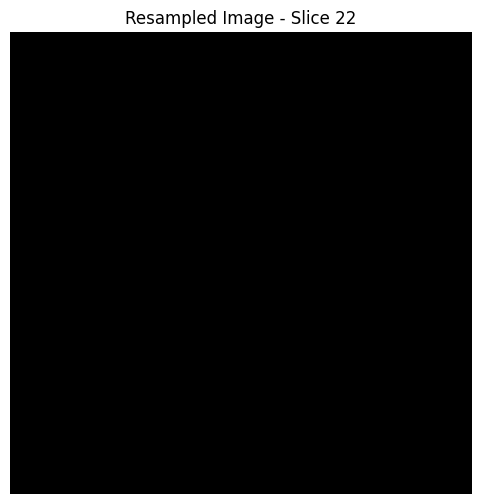

In [ ]:
# Define the new spacing for the resampled image
new_spacing = [0.5, 0.5, 3.0]

# Resample the original image using the specified new spacing
resampled_img = resample_image(img, new_spacing)

# Convert the resampled image to a numpy array
resampled_img_data = sitk.GetArrayFromImage(resampled_img)

print(f"Resampled image shape: {resampled_img_data.shape}")

print("Resampled image data:")
print(resampled_img_data)

for i in range(resampled_img_data.shape[0]):
    plt.figure(figsize=(6, 6))
    plt.imshow(resampled_img_data[i, :, :], cmap='gray')
    plt.title(f'Resampled Image - Slice {i}')
    plt.axis('off')
    plt.show()

In [ ]:
# Define the folder to save the resampled images
output_folder = '/content/resampled_images'
os.makedirs(output_folder, exist_ok=True)

# Loop through each .nii.gz file and resample the image
for nii_file in nii_files:
  # Read the original image
    img = sitk.ReadImage(str(nii_file))
    # Resample the image using the previously defined new_spacing
    resampled_img = resample_image(img, new_spacing)

# Define the output file path for the resampled image
    output_file_path = Path(output_folder) / nii_file.name
    # Save the resampled image to the output folder
    sitk.WriteImage(resampled_img, str(output_file_path))

In [ ]:
# Define the path to the output folder
output_path = Path(output_folder)

# List all resampled .nii.gz files in the output folder
resampled_imgs = list(output_path.glob('*.nii.gz'))

x_diffs = []
y_diffs = []
prostate_centers = []

# Loop through each resampled image file
for resampled_img in resampled_imgs:
  # Read the resampled image
  resampled_img = sitk.ReadImage(str(resampled_img))
  # Convert the resampled image to a numpy array
  img_data = sitk.GetArrayFromImage(resampled_img)

# Find the indices of voxels that have a value of 1 (these represent the prostate)
  ones_indices = np.argwhere(img_data == 1)

  if ones_indices.size == 0:
      print(f"Image: {resampled_img} contains no ones.")
      continue

  # Extract the x and y indices of the ones
  x_indices = ones_indices[:, 2]
  y_indices = ones_indices[:, 1]

# Calculate the minimum and maximum x and y indices
  min_x, max_x = x_indices.min(), x_indices.max()
  min_y, max_y = y_indices.min(), y_indices.max()

 # Calculate the differences in x and y dimensions and append to the lists
  x_diffs.append(max_x - min_x)
  y_diffs.append(max_y - min_y)

  # Calculate the center of the prostate
  center_x = np.mean(x_indices)
  center_y = np.mean(y_indices)
  prostate_centers.append((center_x, center_y))

# Average and max size of prostate


In [ ]:
# Average difference in x dimension across all images
x_diff_avg = np.mean(x_diffs)
# Average difference in y dimension across all images
y_diff_avg = np.mean(y_diffs)

# Calculate the standard deviation of the differences in x dimension
x_std = np.std(x_diffs)
# Calculate the standard deviation of the differences in y dimension
y_std = np.std(y_diffs)

print(f"Average difference in x: {x_diff_avg} (Std: {x_std})")
print(f"Average difference in y: {y_diff_avg} (Std: {y_std})")

Average difference in x: 106.704 (Std: 15.173278617358873)
Average difference in y: 87.89733333333334 (Std: 19.254820856663983)


In [ ]:
print(f"The max diff in x: {np.max(x_diffs)}")
print(f"The max diff in y: {np.max(y_diffs)}")

# The largest prostate size (pixel coordiantes) observed in the dataset assunming is centered is:

The max diff in x: 172
The max diff in y: 179


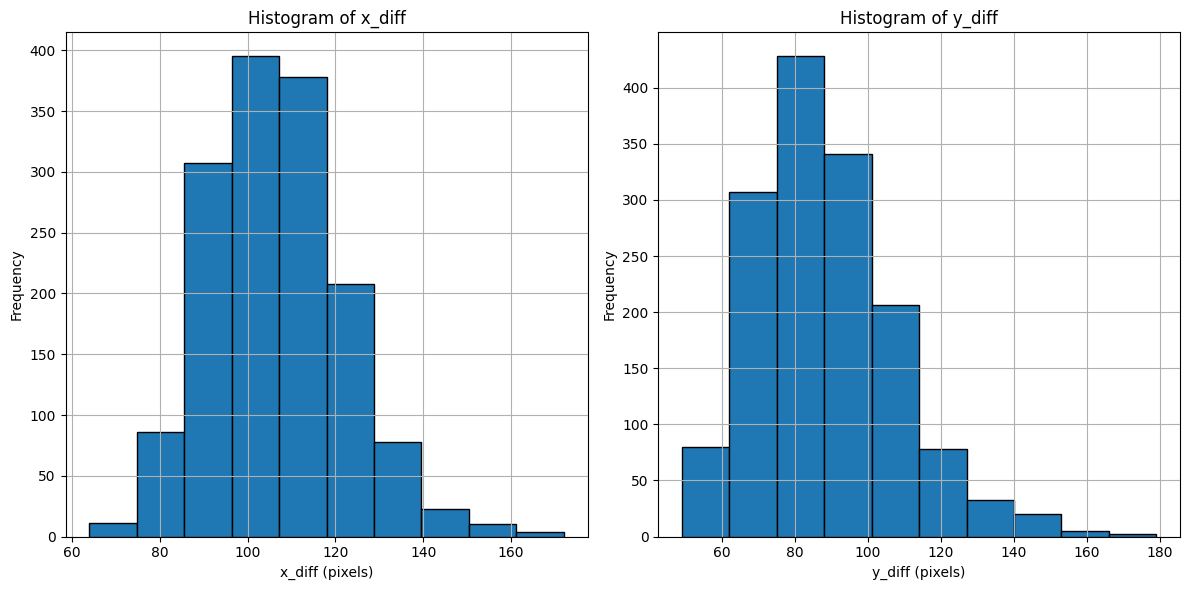

In [ ]:
x_hist, x_bins = np.histogram(x_diffs, bins=10)
y_hist, y_bins = np.histogram(y_diffs, bins=10)

plt.figure(figsize=(12, 6))

# Plot histogram of x differences
plt.subplot(1, 2, 1)
plt.bar(x_bins[:-1] + np.diff(x_bins) / 2, x_hist, width=np.diff(x_bins), edgecolor='black')
plt.title('Histogram of x_diff')
plt.xlabel('x_diff (pixels)')
plt.ylabel('Frequency')
plt.grid(True)

# Plot histogram of y differences
plt.subplot(1, 2, 2)
plt.bar(y_bins[:-1] + np.diff(y_bins) / 2, y_hist, width=np.diff(y_bins), edgecolor='black')
plt.title('Histogram of y_diff')
plt.xlabel('y_diff (pixels)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()



# Converting to Milimeters (mm) to verify the estimation is correct

In [ ]:
# Basen of the voxel spacing from the resampled images (in mm) from Fred
voxel_spacing = [0.5, 0.5, 3.0]

# sizes in pixels
max_x_diff = 172
max_y_diff = 179

avg_x_diff = 107
avg_y_diff = 88

# Convert pixel to millimeters
max_x_mm = max_x_diff * voxel_spacing[0]
max_y_mm = max_y_diff * voxel_spacing[1]

avg_x_mm = avg_x_diff * voxel_spacing[0]
avg_y_mm = avg_y_diff * voxel_spacing[1]

# From millimeters to centimeters.
max_x_cm = max_x_mm / 10
max_y_cm = max_y_mm / 10

avg_x_cm = avg_x_mm / 10
avg_y_cm = avg_y_mm / 10


print(f"Maximum size in X (width): {max_x_diff} pixels = {max_x_cm} cm")
print(f"Maximum size in Y (height): {max_y_diff} pixels = {max_y_cm} cm")

print(f"Average size in X (width): {avg_x_diff} pixels = {avg_x_cm} cm")
print(f"Average size in Y (height): {avg_y_diff} pixels = {avg_y_cm} cm")


Maximum size in X (width): 172 pixels = 8.6 cm
Maximum size in Y (height): 179 pixels = 8.95 cm
Average size in X (width): 107 pixels = 5.35 cm
Average size in Y (height): 88 pixels = 4.4 cm


# Average x and y coordinates of the prostate centers from all images

Average center of the prostate: (214.48861318020957, 215.07983849570954)


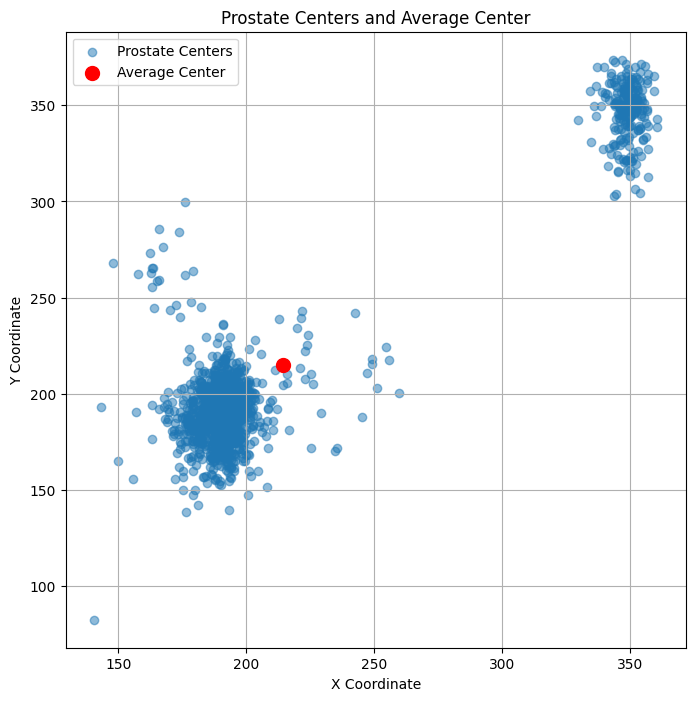

In [ ]:
# calculates the average x and y coordinates of the prostate centers from all images
avg_center_x = np.mean([center[0] for center in prostate_centers])
avg_center_y = np.mean([center[1] for center in prostate_centers])

print(f"Average center of the prostate: ({avg_center_x}, {avg_center_y})")

# Plot the average center of the prostate
plt.figure(figsize=(8, 8))
plt.scatter(*zip(*prostate_centers), alpha=0.5, label='Prostate Centers')
plt.scatter(avg_center_x, avg_center_y, color='red', label='Average Center', s=100)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Prostate Centers and Average Center')
plt.legend()
plt.grid(True)
plt.show()


The two clusters might be due to different groups of images, possibly from different sources or obtained under different conditions, leading to different anatomical locations of the prostate in the images.